In [1]:
import umap.umap_ as umap
from PIL import Image
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pytesseract
from pytesseract import Output
%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\ewang\AppData\Local\Tesseract-OCR\tesseract.exe'

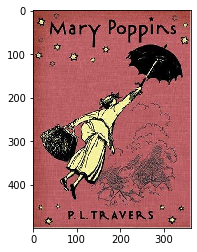

In [2]:
img = cv2.imread('image/113996.jpg')
training_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image,cv2.COLOR_BGR2GRAY)
plt.imshow(training_image)

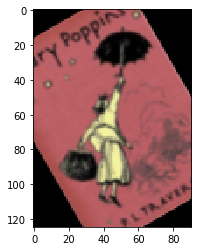

In [3]:
# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
plt.imshow(test_image)

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  69


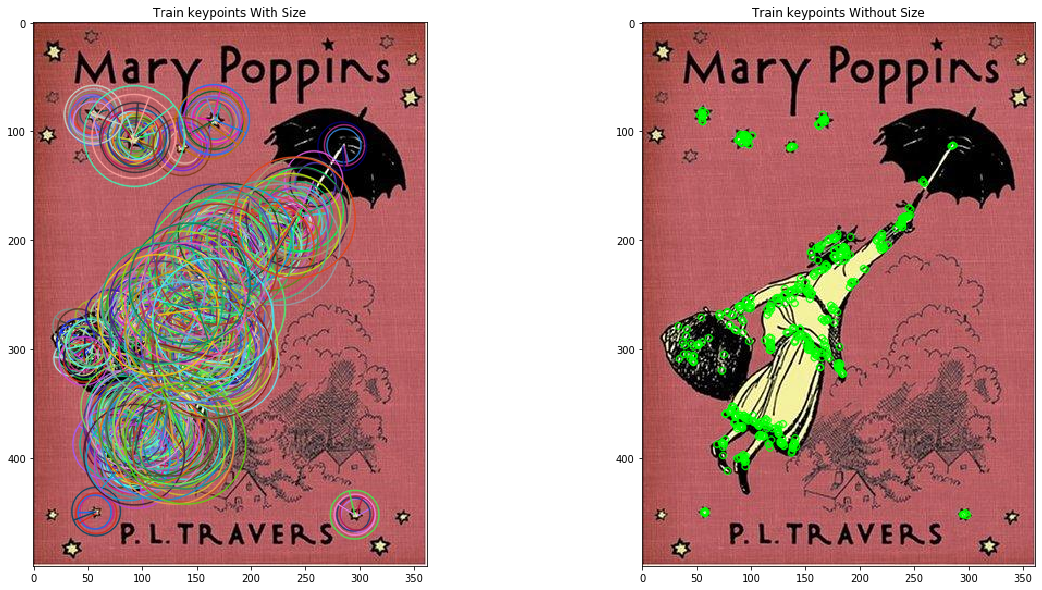

In [4]:

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

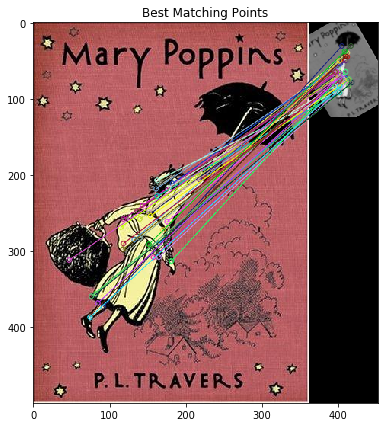


Number of Matching Keypoints Between The Training and Query Images:  39


In [5]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [11]:
index_params = dict(algorithm=6,
                    table_number=6,
                    key_size=12,
                    multi_probe_level=2)
search_params = {}

flann = cv2.FlannBasedMatcher(index_params, search_params)


In [29]:
metadata[700:]

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Best Match,Most Similar Book
700,920,6891572,Love in Amber,Netta Muskett,NaN,Romance,"['Comtemporary', 'Romance', 'Fiction in Englis...",151500,0.601475,0.283799,0.376680,6.200267,6555691.0,2087919
701,939,7426008,Como me lo contaron,Corín Tellado,NaN,Romance,['Romance'],168500,0.699705,0.174420,0.464130,5.231608,7422152.0,1952815
702,964,7386743,Una mujer fea,Corín Tellado,NaN,Romance,['Romance'],175500,0.535780,0.143800,0.459920,5.083601,7412380.0,6765692
703,681,760088,Double Standards,Judith McNaught,NaN,Romance,"['American Love stories', 'Translations into R...",155000,0.801816,0.041283,0.675930,4.222673,5783825.0,7397528
704,772,4289510,The Family Way,Jayne Ann Krentz,NaN,Romance,"['Accessible book', 'Fiction', 'Romance', 'Unm...",25344,0.716866,0.342434,0.443546,5.888109,9323749.0,5233114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2327,437864,Dragonsinger,Anne McCaffrey,NaN,Fantasy,"['Fantasy', 'Harper Hall', 'Juvenile fiction',...",136325,0.610432,0.339056,0.539127,5.288212,6555691.0,170288
996,2115,368884,"The Tombs of Atuan (The Earthsea Cycle, Book 2)",Ursula K. Le Guin,NaN,Fantasy,"['Science Fiction, Fantasy, & Magic', 'Young a...",134425,0.582648,0.520716,0.694049,5.265035,9200423.0,11342
997,2424,6987328,The Hero and the Crown,Robin McKinley,NaN,Fantasy,"['Tomboys', 'Women heroes', 'Family', 'Action ...",143500,0.197146,0.209737,0.540688,4.443804,8129289.0,1063554
998,2138,50996,In the Night Kitchen,Maurice Sendak,NaN,Fantasy,"['Baking', 'Picture books', 'Fantasy fiction',...",171475,0.596780,0.183828,0.373658,6.051948,954346.0,2739997


In [33]:
img1 = cv2.imread('1000images/760088.jpg')
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('1000images/7397528.jpg')
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

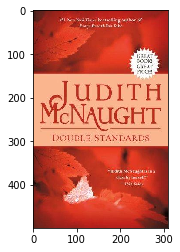

In [34]:
plt.imshow(gray1)

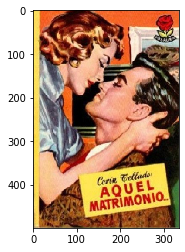

In [35]:
plt.imshow(gray2)

In [135]:
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

In [139]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x : x.distance)[:10]
result = cv2.drawMatches(gray1, kp1, gray2, kp2, matches, gray2, flags = 2)


In [140]:
# matches = flann.knnMatch(des1, des2, k=2)
# good = []
# for m,n in matches:
#     if m.distance < 0.8*n.distance:
#         good.append([m])
# result = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=4)

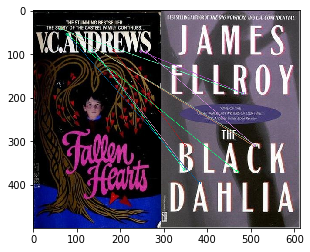

In [141]:
plt.imshow(result)

In [3]:
metadata = pd.read_csv('orbmatching.csv')

In [5]:
orb = cv2.ORB_create()

lst_kd = []
lst_desc = []
cnt_none = 0
for cover_id in metadata['cover_id']:
    path = "1000images/"+str(cover_id)+".jpg"
    image = cv2.imread(path)
    try:
        gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        keypoint, descriptor = orb.detectAndCompute(gray, None)
        lst_kd.append([keypoint,descriptor])
        lst_desc.append(descriptor)
    except Exception as e:
        print(e)
        cnt_none += 1
        lst_kd.append([[],None])
        lst_desc.append(None)



OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4048: error: (-215:Assertion failed) inv_scale_x > 0 in function 'cv::resize'



In [251]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
lst_best_match = []
for i in range(len(lst_kd)):
    if i % 100 == 0:
        print(i," Covers Done")
    i_kd = lst_kd[i]
    if i_kd[1] is None:
        lst_best_match.append(None)
        continue
    min_dist = 99999999
    min_dist_idx = None
    for j in range(len(lst_kd)):
        j_kd = lst_kd[j]
        if j_kd[1] is None:
            continue
        matches = bf.match(i_kd[1], j_kd[1])
        good = sorted(matches, key = lambda x : x.distance)[:10]
        total_distance = 0
        for m in good:
            total_distance += m.distance
        avg_dist = total_distance / len(good)
        if 0 < avg_dist < min_dist:
            min_dist = avg_dist
            min_dist_idx = j
    lst_best_match.append(min_dist_idx)

0  Covers Done
10  Covers Done
20  Covers Done
30  Covers Done
40  Covers Done
50  Covers Done
60  Covers Done
70  Covers Done
80  Covers Done
90  Covers Done
100  Covers Done
110  Covers Done
120  Covers Done
130  Covers Done
140  Covers Done
150  Covers Done
160  Covers Done
170  Covers Done
180  Covers Done
190  Covers Done
200  Covers Done
210  Covers Done
220  Covers Done
230  Covers Done
240  Covers Done
250  Covers Done
260  Covers Done
270  Covers Done
280  Covers Done
290  Covers Done
300  Covers Done
310  Covers Done
320  Covers Done
330  Covers Done
340  Covers Done
350  Covers Done
360  Covers Done
370  Covers Done
380  Covers Done
390  Covers Done
400  Covers Done
410  Covers Done
420  Covers Done
430  Covers Done
440  Covers Done
450  Covers Done
460  Covers Done
470  Covers Done
480  Covers Done
490  Covers Done
500  Covers Done
510  Covers Done
520  Covers Done
530  Covers Done
540  Covers Done
550  Covers Done
560  Covers Done
570  Covers Done
580  Covers Done
590  Cov

In [43]:
lst_best_match_cover_id = []
for idx in lst_best_match:
    if idx is None:
        lst_best_match_cover_id.append(None)
        continue
    match_cover_id = metadata['cover_id'].iloc[idx]
    lst_best_match_cover_id.append(str(match_cover_id))
metadata['Best Match'] = pd.Series(lst_best_match_cover_id)

NameError: name 'lst_best_match' is not defined

In [3]:
# metadata.to_csv('orbmatching.csv', index = False)
metadata = pd.read_csv('orbmatching.csv')

In [4]:
correct = 0
lst_correctly_matched = []
for cover in metadata['cover_id'].tolist():
    cover_metadata = metadata[metadata['cover_id']==cover]
    cover_genre = cover_metadata['genre'].iloc[0]
    bm = cover_metadata['Best Match'].iloc[0]
    if bm is None or pd.isnull(bm):
        continue
    bm_genre = metadata[metadata['cover_id']==int(bm)]['genre'].iloc[0]
    if cover_genre == bm_genre:
        correct += 1
        lst_correctly_matched.append(1)
    else:
        lst_correctly_matched.append(0)
metadata['Correct_Match'] = pd.Series(lst_correctly_matched)

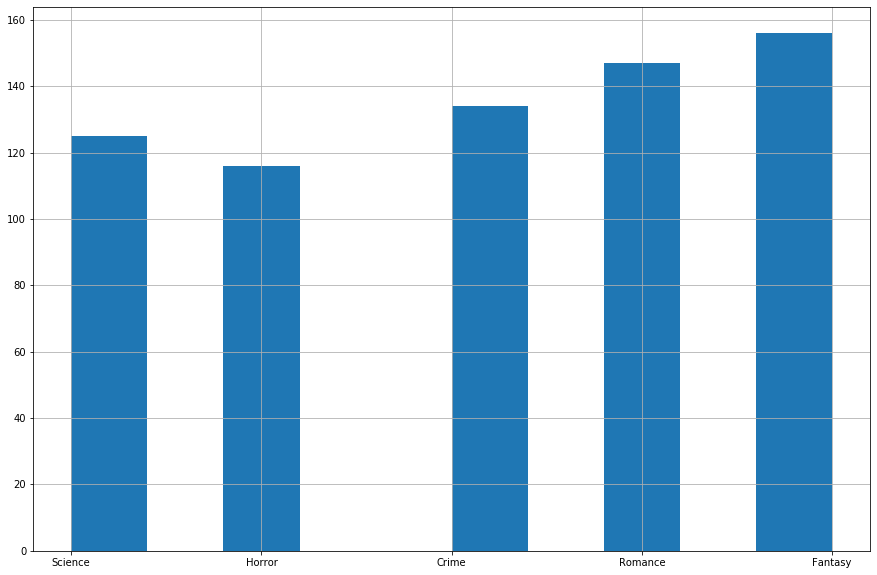

In [5]:
ax = metadata[metadata['Correct_Match']==0]['genre'].hist(figsize=(15,10))

In [117]:
correct / len(metadata)

0.313

In [323]:
metadata[metadata['Correct_Match']==1][200:]

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Best Match,Correct_Match
521,1358,1342793,Taking Sides,Richard C. Monk,NaN,Crime,"['Administration of Criminal justice', 'Crimin...",147725,0.460758,0.539437,0.147843,4.676921,7401520,1.0
522,1231,7925210,How Criminals Are Made And Prevented,Canon Horsley,NaN,Crime,"['Greek language', 'Prisons', 'Accessible book...",149500,0.683048,0.114834,0.436293,3.342046,6022430,1.0
524,1016,844681,Powers,Brian Michael Bendis,NaN,Crime,"['Organized crime', 'Graphic Novels - General'...",149150,0.581721,0.657914,0.371976,5.259496,1133035,1.0
528,1399,9008627,"Women, crime, and criminology",Carol Smart,NaN,Crime,"['Frauenkriminalita\x98t', 'Feminist theory', ...",159500,0.608839,0.491711,0.766200,4.460604,6555691,1.0
529,1200,5917396,Remarks on some of the provisions of the laws ...,"Quincy, Josiah",NaN,Crime,"['Criminal law', 'Accessible book', 'Prisons',...",139500,0.915997,0.112431,0.409939,4.034892,5663748,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2077,6384556,The Borrowers,Mary Norton,NaN,Fantasy,"['Fantasy', 'Juvenile fiction', 'Accessible bo...",164000,0.507474,0.243056,0.468782,5.841139,6915904,1.0
966,2047,8798426,The Phantom Tollbooth,Norton Juster,NaN,Fantasy,"['letters', 'Imaginación', 'Spanish language m...",250000,0.790907,0.485218,0.850511,2.595610,5895767,1.0
969,2426,8113419,Saint Odd,Dean Koontz,NaN,Fantasy,"['Fiction', 'Cooks', 'Odd Thomas (Fictitious c...",153000,0.408547,0.042521,0.115981,4.509991,6555691,1.0
970,2184,6765692,Coraline,Neil Gaiman,NaN,Fantasy,"['Blind', 'Books and reading', 'Young adult fi...",106000,0.237240,0.127437,0.486931,4.107907,7885129,1.0


In [9]:
metadata = pd.read_csv('orbmatching.csv')

In [10]:
def get_rgb_hist(metadata):
    lst_rgb_hist = []
    for cover_id in metadata['cover_id']:
        path = "1000images/"+str(cover_id)+".jpg"
        image = cv2.imread(path)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
        norm_hist = cv2.normalize(hist, None)
        lst_rgb_hist.append(norm_hist)
    return lst_rgb_hist

def get_hist_corr(lst_rgb_hist):
    lst_img_corr = []
    for i in range(len(lst_rgb_hist)):
        i_hist = lst_rgb_hist[i]
        lst_corr = []
        for j in range(len(lst_rgb_hist)):
            j_hist = lst_rgb_hist[j]
            corr = cv2.compareHist(i_hist, j_hist, cv2.HISTCMP_CORREL)
            lst_corr.append(corr)
        lst_img_corr.append(lst_corr)
    return lst_img_corr

def get_max_corr(lst_img_corr):
    lst_max_corr_idx = []
    for i in range(len(lst_img_corr)):
        lst_corr = lst_img_corr[i]
        max_corr = 0
        max_corr_idx = 0
        for j in range(len(lst_corr)):
            corr = lst_corr[j]
            if corr == 1:
                continue
            else:
                if corr > max_corr:
                    max_corr = corr
                    max_corr_idx = j
        lst_max_corr_idx.append(max_corr_idx)
    return lst_max_corr_idx

In [11]:
lst_rgb_hist = get_rgb_hist(metadata)
lst_img_corr = get_hist_corr(lst_rgb_hist)
lst_max_corr_idx = get_max_corr(lst_img_corr)

In [5]:
lst_max_corr_cover_id = []
for idx in lst_max_corr_idx:
    row = metadata.iloc[idx]
    lst_max_corr_cover_id.append(row['cover_id'])
metadata['Most Similar Book'] = pd.Series(lst_max_corr_cover_id)

In [6]:
metadata

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Best Match,Most Similar Book
0,36,5914638,Philosophical essays,Bertrand Russell,NaN,Science,"['Science', 'Addresses, essays, lectures', 'Ph...",150500,0.959789,0.144656,0.203297,1.811002,6238696.0,1283450
1,275,9041714,A short history of nearly everything,Bill Bryson,NaN,Science,"['Obras de divulgacio n.', 'Humor', 'Travel', ...",164500,0.351122,0.665346,0.288933,3.827606,528671.0,1401713
2,178,2752324,Scientific lectures and essays,Charles Kingsley,NaN,Science,"['Science', 'Accessible book', 'Popular works'...",166500,0.350557,0.344802,0.443802,3.237068,1755515.0,1755515
3,429,5735894,Modern science and modern thought,S. Laing,NaN,Science,"['Religion and science', 'Science', 'Accessibl...",150500,0.966997,0.126181,0.171627,3.318635,6022430.0,1283450
4,401,1256750,Quantitative zoology,George Gaylord Simpson,NaN,Science,"['Biology, Life Sciences', 'Science / Biology'...",158000,0.592427,0.539194,0.714298,5.062434,5735894.0,961518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2327,437864,Dragonsinger,Anne McCaffrey,NaN,Fantasy,"['Fantasy', 'Harper Hall', 'Juvenile fiction',...",136325,0.610432,0.339056,0.539127,5.288212,6555691.0,170288
996,2115,368884,"The Tombs of Atuan (The Earthsea Cycle, Book 2)",Ursula K. Le Guin,NaN,Fantasy,"['Science Fiction, Fantasy, & Magic', 'Young a...",134425,0.582648,0.520716,0.694049,5.265035,9200423.0,11342
997,2424,6987328,The Hero and the Crown,Robin McKinley,NaN,Fantasy,"['Tomboys', 'Women heroes', 'Family', 'Action ...",143500,0.197146,0.209737,0.540688,4.443804,8129289.0,1063554
998,2138,50996,In the Night Kitchen,Maurice Sendak,NaN,Fantasy,"['Baking', 'Picture books', 'Fantasy fiction',...",171475,0.596780,0.183828,0.373658,6.051948,954346.0,2739997


In [41]:
correct = 0
lst_correctly_matched = []
for cover in metadata['cover_id'].tolist():
    cover_metadata = metadata[metadata['cover_id']==cover]
    cover_genre = cover_metadata['genre'].iloc[0]
    bm = cover_metadata['Best Match'].iloc[0]
    if bm is None or pd.isnull(bm):
        continue
    bm_genre = metadata[metadata['cover_id']==int(bm)]['genre'].iloc[0]
    if cover_genre == bm_genre:
        correct += 1
        lst_correctly_matched.append(1)
    else:
        lst_correctly_matched.append(0)
metadata['Correct_Match'] = pd.Series(lst_correctly_matched)

In [42]:
metadata

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Best Match,Most Similar Book,RGB_Correct_Match,Correct_Match
0,36,5914638,Philosophical essays,Bertrand Russell,NaN,Science,"['Science', 'Addresses, essays, lectures', 'Ph...",150500,0.959789,0.144656,0.203297,1.811002,6238696.0,1283450,0,0.0
1,275,9041714,A short history of nearly everything,Bill Bryson,NaN,Science,"['Obras de divulgacio n.', 'Humor', 'Travel', ...",164500,0.351122,0.665346,0.288933,3.827606,528671.0,1401713,0,1.0
2,178,2752324,Scientific lectures and essays,Charles Kingsley,NaN,Science,"['Science', 'Accessible book', 'Popular works'...",166500,0.350557,0.344802,0.443802,3.237068,1755515.0,1755515,0,0.0
3,429,5735894,Modern science and modern thought,S. Laing,NaN,Science,"['Religion and science', 'Science', 'Accessibl...",150500,0.966997,0.126181,0.171627,3.318635,6022430.0,1283450,0,1.0
4,401,1256750,Quantitative zoology,George Gaylord Simpson,NaN,Science,"['Biology, Life Sciences', 'Science / Biology'...",158000,0.592427,0.539194,0.714298,5.062434,5735894.0,961518,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2327,437864,Dragonsinger,Anne McCaffrey,NaN,Fantasy,"['Fantasy', 'Harper Hall', 'Juvenile fiction',...",136325,0.610432,0.339056,0.539127,5.288212,6555691.0,170288,0,NaN
996,2115,368884,"The Tombs of Atuan (The Earthsea Cycle, Book 2)",Ursula K. Le Guin,NaN,Fantasy,"['Science Fiction, Fantasy, & Magic', 'Young a...",134425,0.582648,0.520716,0.694049,5.265035,9200423.0,11342,1,NaN
997,2424,6987328,The Hero and the Crown,Robin McKinley,NaN,Fantasy,"['Tomboys', 'Women heroes', 'Family', 'Action ...",143500,0.197146,0.209737,0.540688,4.443804,8129289.0,1063554,0,NaN
998,2138,50996,In the Night Kitchen,Maurice Sendak,NaN,Fantasy,"['Baking', 'Picture books', 'Fantasy fiction',...",171475,0.596780,0.183828,0.373658,6.051948,954346.0,2739997,0,NaN


In [12]:
lst_rgb_hist_flat = []
for hist in lst_rgb_hist:
    lst_rgb_hist_flat.append(hist.flatten())

In [13]:
import umap.umap_ as umap

In [14]:
reducer = umap.UMAP()

In [15]:
embedding = reducer.fit_transform(lst_rgb_hist_flat)
embedding.shape

(1000, 2)

In [16]:
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))

In [17]:
umap_df['label'] = metadata['genre']

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt


<Figure size 1080x1152 with 0 Axes>

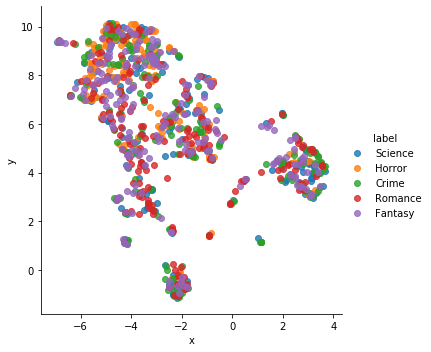

In [20]:
plt.figure(figsize=(15,16))
rgb_hist_umap = sns.lmplot( x="x", y="y", data=umap_df, fit_reg=False, hue='label', legend=True)
rgb_hist_umap.savefig("rgb_hist_umap.png")

In [34]:
size = 24, 32
lst_thumbnails = []
lst_thumbnail_path = []
for cover_id in metadata['cover_id']:
    path = "1000images/"+str(cover_id)+".jpg"
    im = Image.open(path)
    im.thumbnail(size)
    thumbnail_path = 'thumbnail/'+str(cover_id)+'.jpg'
    im.save(thumbnail_path)
    lst_thumbnail_path.append(thumbnail_path)
    lst_thumbnails.append(thumbnail_path)

In [35]:
umap_df['thumnail_path'] = pd.Series(lst_thumbnail_path)

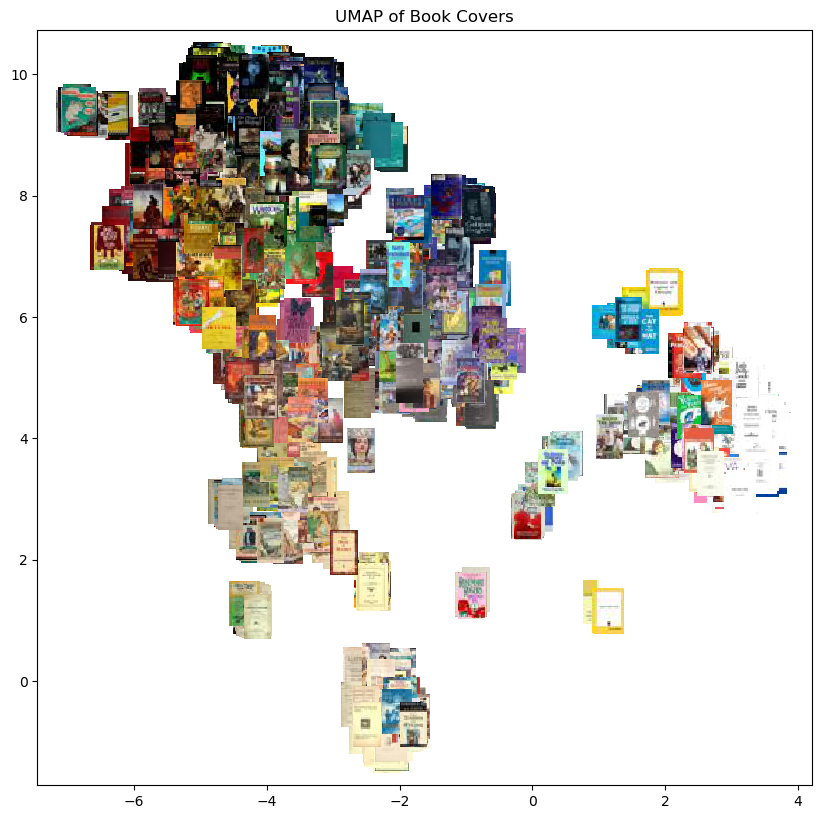

In [36]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.scatter(umap_df['x'].values, umap_df['y'].values) 
coords = umap_df[['x','y','thumnail_path']].values
for i in range(len(coords)):
    img = OffsetImage(plt.imread(coords[i][2]))
    ab = AnnotationBbox(img, (coords[i][0], coords[i][1]), frameon=False)
    ax.add_artist(ab)

plt.title('UMAP of Book Covers')
fig.savefig('output/UMAP of Book Covers.jpg')